In [1]:
import pandas as pd
df = pd.read_csv("/Users/thomashilger/Desktop/pfe/imatag/website_categorization_custom/categorization/Datasets/Feature_dataset_2023-02-01_clean_full.csv")
df = df.drop("Unnamed: 0", axis = 1)

from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, GlobalAveragePooling1D
from keras.callbacks import EarlyStopping
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from sklearn.model_selection import train_test_split
import pandas as pd
import ast

def convert_to_list(row):
    return ast.literal_eval(row['tokens'])

df['tokens'] = df.apply(convert_to_list, axis = 1)

data = []
for index,row in df.iterrows():
    data.append({"class":row["main_category"], "tokens":row["tokens"]})

words = []
classes = []
documents = []

data_tokens = [' '.join(data[i]['tokens']) for i in range(len(data))]

y = [data[i]['class'] for i in range(len(data))]

2023-02-24 10:31:22.549546: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.12) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [2]:

from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, GlobalAveragePooling1D, Flatten
from keras.callbacks import EarlyStopping
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from sklearn.model_selection import train_test_split
import pandas as pd
from gensim.models import Word2Vec


In [3]:
labels = pd.get_dummies(y)

# Prétraiter les textes
w2v_model = Word2Vec(data_tokens, vector_size=1000, window=5, min_count=1)

tokenizer = Tokenizer(10000)

tokenizer.fit_on_texts(data_tokens)
sequences = tokenizer.texts_to_sequences(data_tokens)
data = pad_sequences(sequences, maxlen=1000,padding='post')

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
matrix = CountVectorizer(max_features=1000)
X = matrix.fit_transform(data_tokens).toarray()
X_padded = pad_sequences(X, maxlen=1000,padding='post')

In [5]:
# Diviser les données en ensembles d'entraînement et de test
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42,stratify=y)


In [31]:
from keras.layers import Dense, Dropout, Embedding, GlobalAveragePooling1D, Flatten,GRU, Conv1D, GlobalMaxPool1D,Activation

# Créer un modèle séquentiel
model = Sequential()

# Ajouter une couche d'embedding pour convertir les mots en vecteurs
model.add(Embedding(input_dim=10000, output_dim=100, input_length=1000))
#model.add(Embedding(10000, 1000, weights=[w2v_model.wv.vectors], input_length=1000, trainable=False))

model.add(GlobalAveragePooling1D())
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=25, activation='sigmoid'))

#model.add(Dropout(0.1))
#model.add(Conv1D(300, 3, padding='valid', activation='relu', strides=1))
#model.add(GlobalMaxPool1D())
#model.add(Dense(25))
#model.add(Activation('sigmoid'))

#model.add(GlobalAveragePooling1D())
#model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.1))
#model.add(Dense(64, activation='relu'))
#model.add(Dropout(0.1))
#model.add(Dense(25, activation='sigmoid'))

# Compiler le modèle avec une fonction de perte et une méthode d'optimisation
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [32]:
# Entraîner le modèle
early_stop = EarlyStopping(monitor='val_loss', patience=5)
history=model.fit(x_train, y_train, batch_size=32, epochs=20, validation_data=(x_test, y_test), callbacks=[early_stop])


Epoch 1/20
268/268 [==============================] - 6s 17ms/step - loss: 3.0951 - accuracy: 0.0993 - val_loss: 2.9856 - val_accuracy: 0.1544
Epoch 2/20
268/268 [==============================] - 5s 17ms/step - loss: 2.8007 - accuracy: 0.2139 - val_loss: 2.5841 - val_accuracy: 0.3097
Epoch 3/20
268/268 [==============================] - 5s 18ms/step - loss: 2.3726 - accuracy: 0.3736 - val_loss: 2.2424 - val_accuracy: 0.4184
Epoch 4/20
268/268 [==============================] - 5s 19ms/step - loss: 2.0325 - accuracy: 0.4654 - val_loss: 2.0278 - val_accuracy: 0.4697
Epoch 5/20
268/268 [==============================] - 5s 20ms/step - loss: 1.7965 - accuracy: 0.5281 - val_loss: 1.9007 - val_accuracy: 0.5098
Epoch 6/20
268/268 [==============================] - 5s 17ms/step - loss: 1.6171 - accuracy: 0.5762 - val_loss: 1.8340 - val_accuracy: 0.5513
Epoch 7/20
268/268 [==============================] - 5s 17ms/step - loss: 1.4745 - accuracy: 0.6123 - val_loss: 1.7938 - val_accuracy: 0.5438

In [33]:
loss, accuracy = model.evaluate(x_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(x_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.7827
Testing Accuracy:  0.5574


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


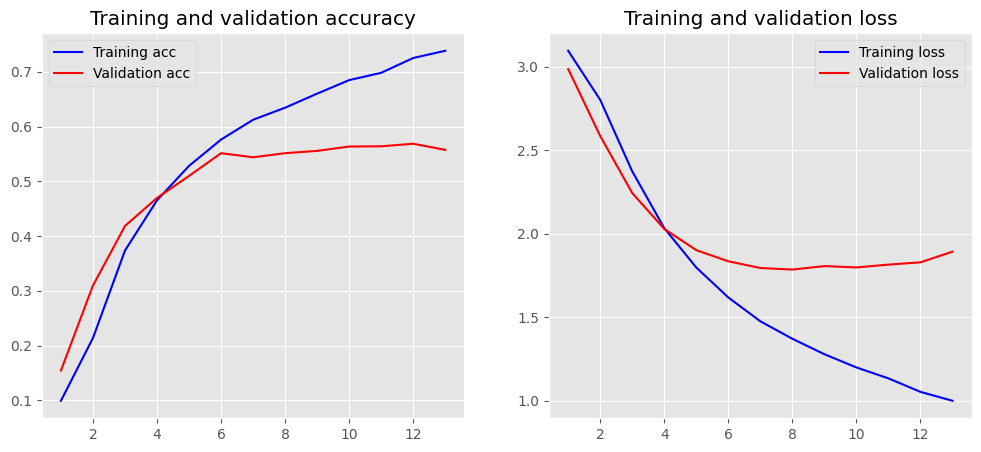

In [34]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    print(history.history.keys())
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

plot_history(history)

In [29]:
y_pred=model.predict(x_test)

67/67 [==============================] - 1s 7ms/step


In [42]:
labels

,Adult,Arts_and_Entertainment,Autos_and_Vehicles,Beauty_and_Fitness,Books_and_Literature,Business_and_Industry,Career_and_Education,Computer_and_Electronics,Finance,Food_and_Drink,...,Law_and_Government,News_and_Media,People_and_Society,Pets_and_Animals,Recreation_and_Hobbies,Reference,Science,Shopping,Sports,Travel
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10713,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10714,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10715,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10716,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
labels.columns[[y_pred[3].argmax()]][0]

'Food_and_Drink'

In [60]:
y_test_label=numpy.array([labels.columns[[y_test.iloc[i].argmax()]][0] for i in range(y_test.shape[0])])

In [61]:
y_pred_label=numpy.array([labels.columns[[y_pred[i].argmax()]][0] for i in range(y_test.shape[0])])

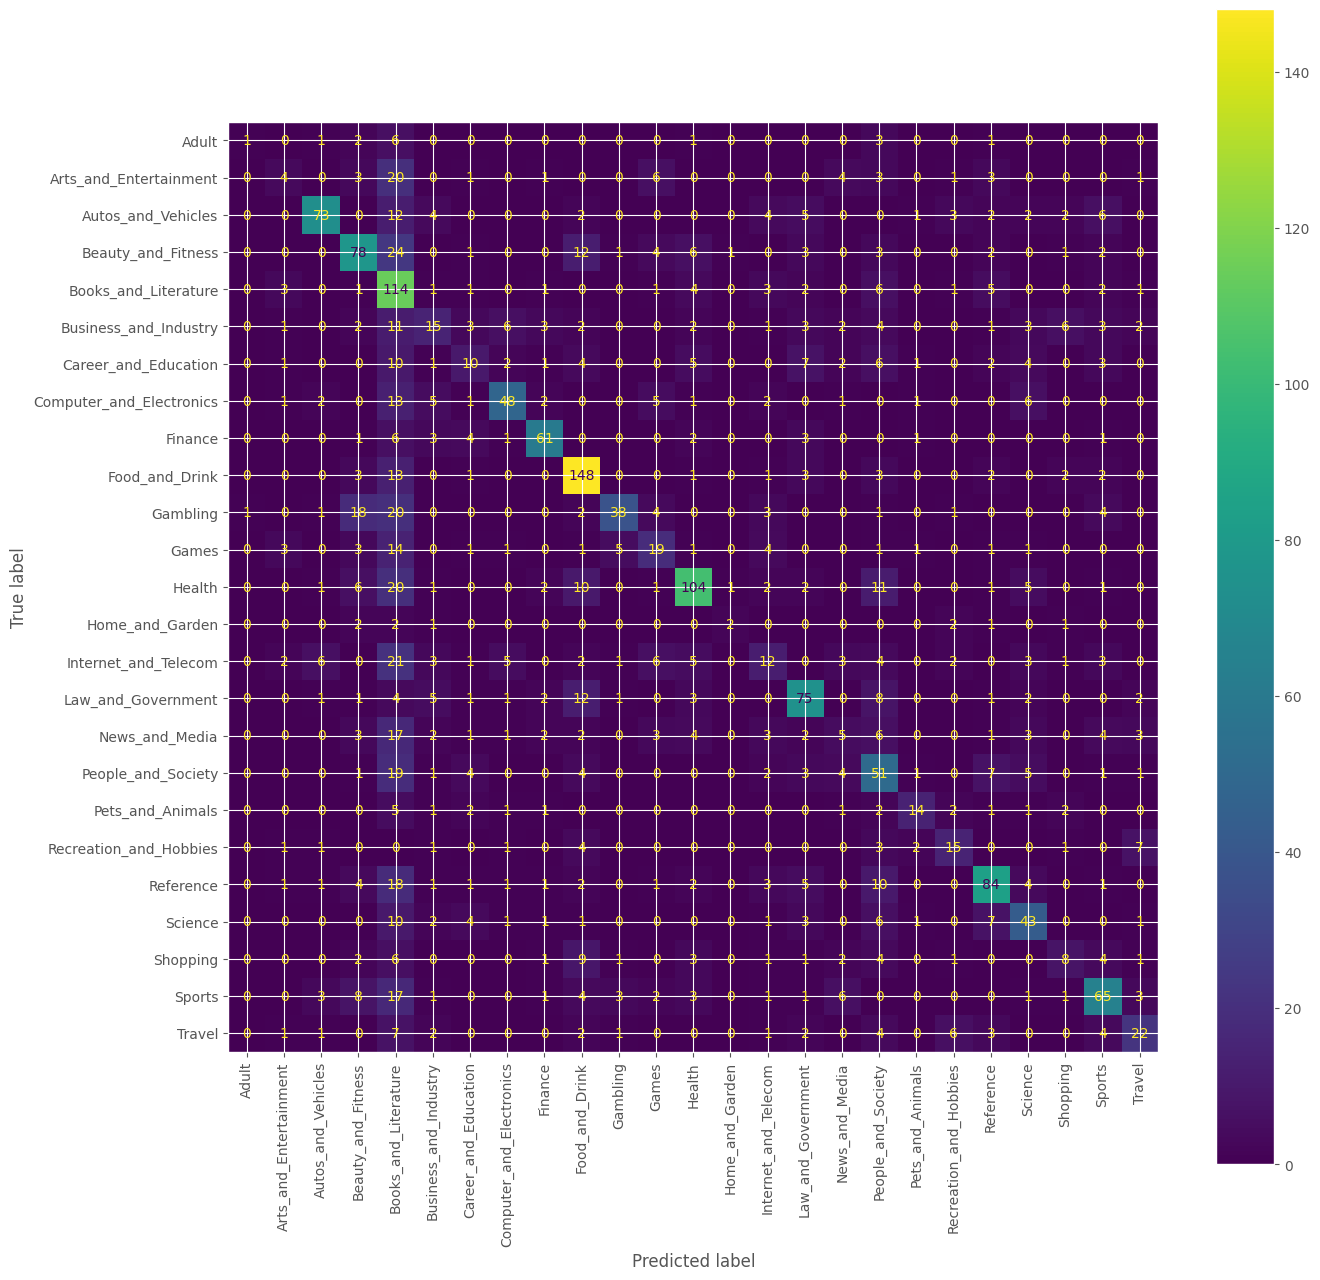

In [62]:
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy

confusion_matrix = metrics.confusion_matrix(y_test_label, y_pred_label)

cm_display = metrics.ConfusionMatrixDisplay.from_predictions(y_test_label, y_pred_label,xticks_rotation='vertical')

fig = cm_display.ax_.get_figure() 
fig.set_figwidth(15)
fig.set_figheight(15)  

plt.show() 

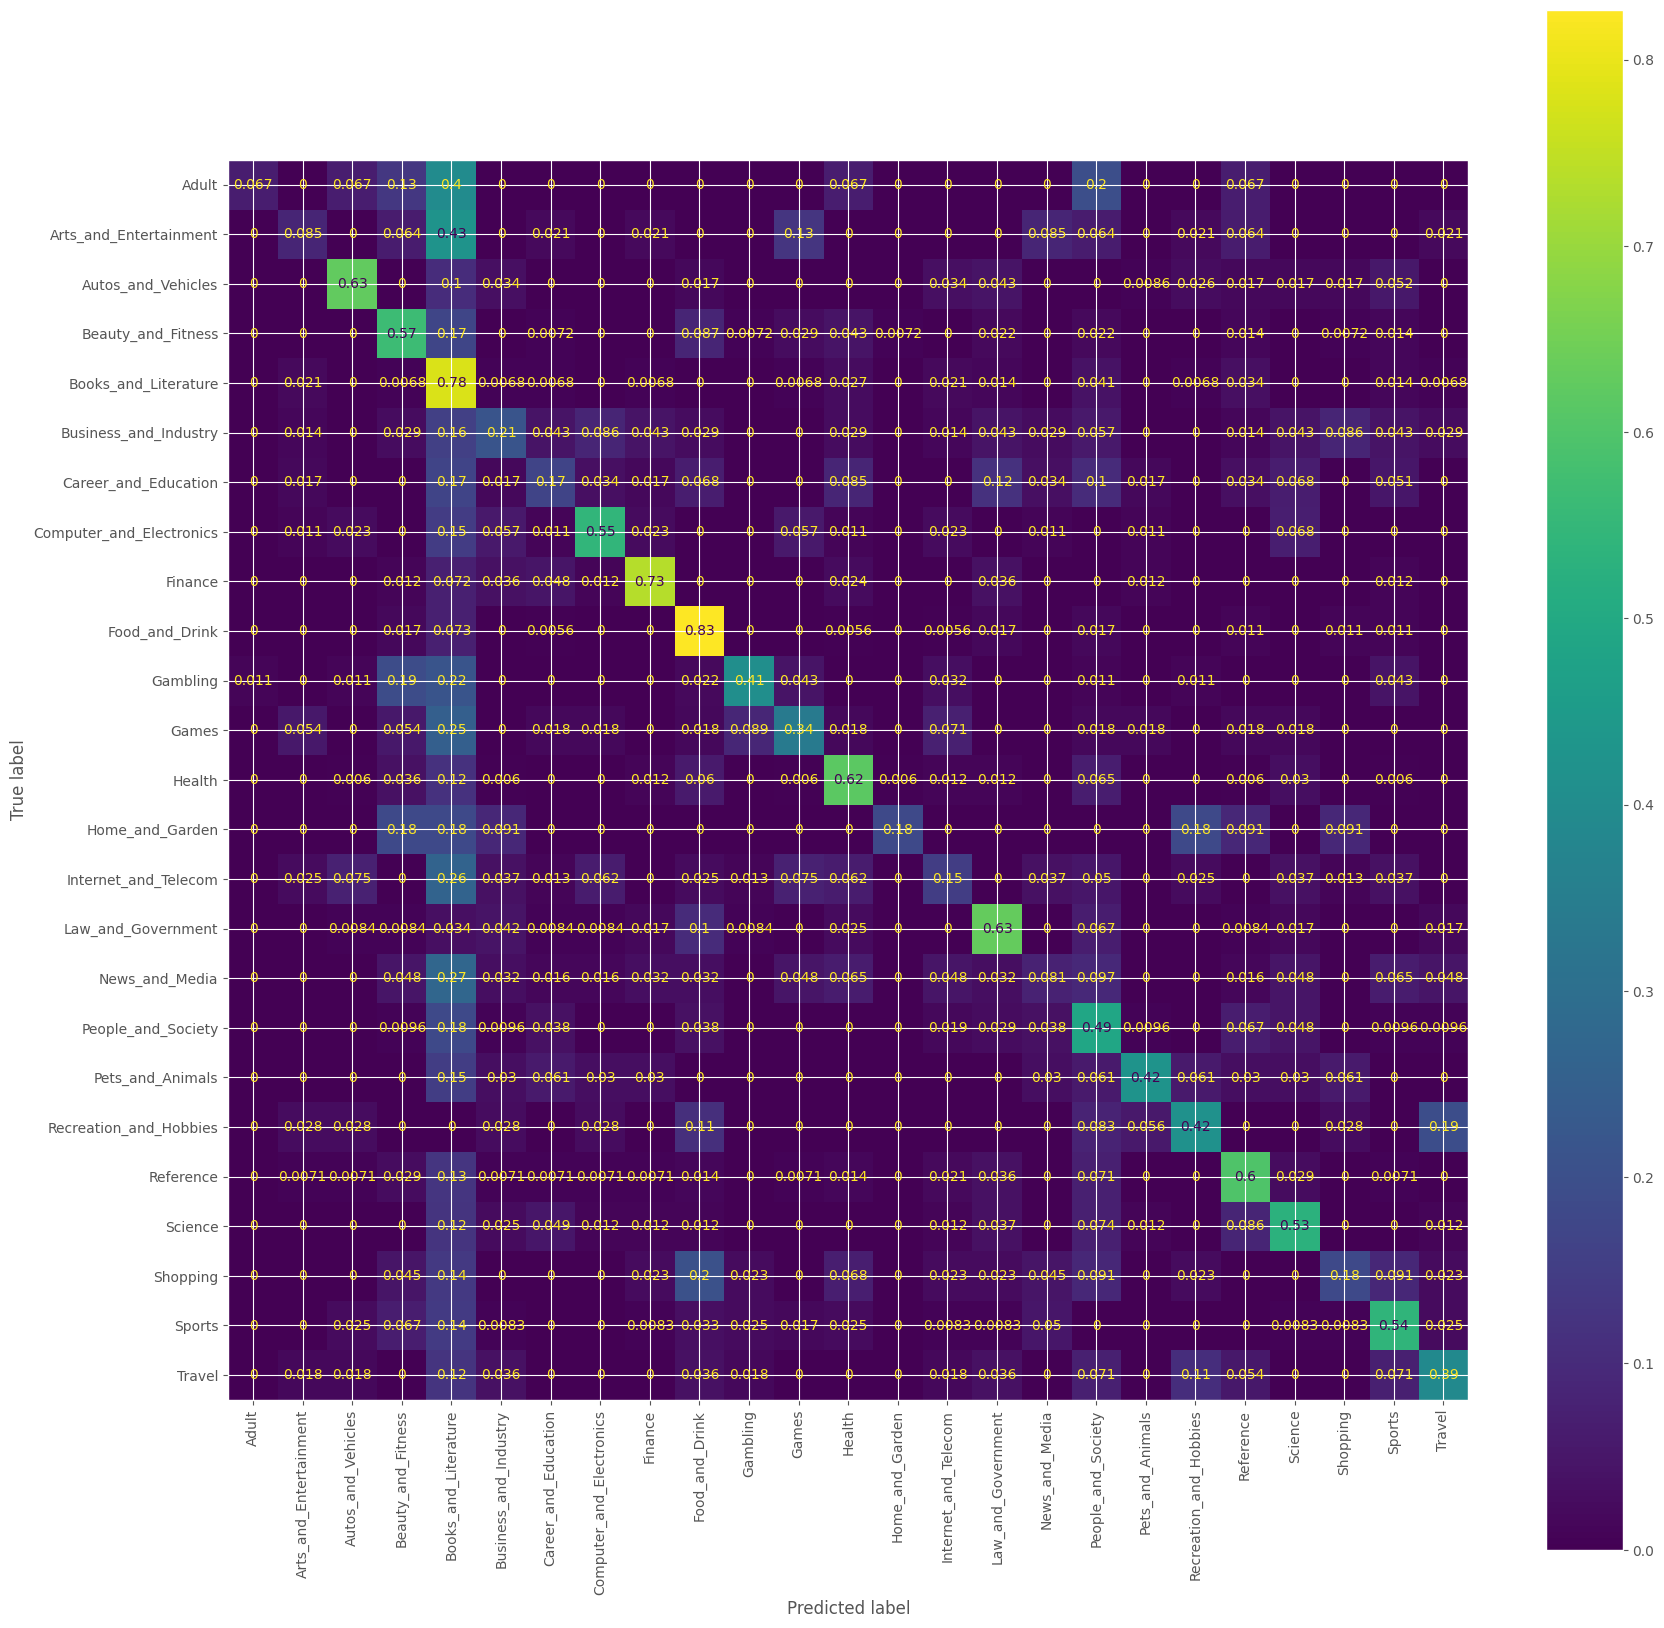

In [70]:
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy

confusion_matrix = metrics.confusion_matrix(y_test_label, y_pred_label)

cm_display = metrics.ConfusionMatrixDisplay.from_predictions(y_test_label, y_pred_label,xticks_rotation='vertical', normalize='true')

fig = cm_display.ax_.get_figure() 
fig.set_figwidth(20)
fig.set_figheight(20)  

plt.show() 